Usando la figura que se muestra a continuación, describir un procedimiento que estime el valor de π.

In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import math

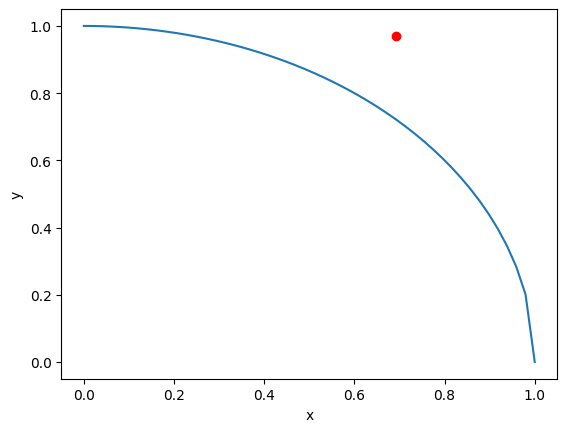

In [2]:
x = np.linspace(0, 1, 50)
U1 = rnd.random()
U2 = rnd.random()
plt.plot(x, np.sqrt(1-x**2))
plt.scatter(U1, U2, color = "red")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

De acuerdo a la figura, se observa que la probabilidad de un punto pertenezca al cuarto de circulo es de $\frac{π}{4}$.

Esta probabilidad tambien se puede expresar mediante la relación $\frac{x}{n}$, donde $x$ es el número de veces que le punto rojo cayo dentro del cuarto de circulo y $n$ es el número de corridas. Entonces:

$$\frac{π}{4}=\frac{x}{n}⟹\hat{π}=4\frac{x}{n}$$

Este es nuestro estimador de $π$.

Consideremos la variable:

$$
x_i = \left\{
            \begin{array}{ll}
	      1 & \mathrm{si\ el\ punto\ cae\ dentro\ del\ cuarto\ de\ circulo} \\
        0 & \mathrm{otro\ caso}
            \end{array}
	      \right.\
$$

Sea $p$ la probabilidad de que un punto caiga dentro del cuarto de circulo y $1-p$ la probabilidad de que caiga fuera, consideremos:

$$z=4\frac{x_1+x_2+...+x_N}{N}$$

Donde $z$ tiene un valor esperado:

$$E[x_i]=1(p)+0(1-p)=p$$

$$E[z]=E\left[4\frac{x_1+x_2+...+x_N}{N}\right]=\frac{4}{N}E[x_1+x_2+...+x_N]=\frac{4Np}{N}=4p$$

Y una varianza:

$$Var[x_i]=E[x_i^2]-E[x_i]^2=1^2(p)+0^2(1-p)-p^2=p(1-p)$$

$$Var[z]=Var\left[4\frac{x_1+x_2+...+x_N}{N}\right]=\frac{16}{N^2}Var[x_1+x_2+...+x_N]=\frac{16Np(1-p)}{N^2}=\frac{16p(1-p)}{N}$$



Queremos saber cuantos puntos o dardos hay que lanzar para que el estimador de π difiera de su valor verdadero una cantidad de decimales determinada, con una seguridad de un cierto porcentaje solicitado.

Como ejemplo, determinemos el número de dardos para que la probabilidad de cometer un error mayor o igual que $0.1$, sea menor que 0.01.

Para esto aplicamos la Desigualdad de Chebyshev:

Si $X$ es una variable aleatoria con media $μ$ y varianza $σ^2$, entonces para cualquier $k > 0$,

$$P(|X-μ|\geq kσ)\leq\frac{1}{k^2}$$

En nuestro caso

$$P(|z-π|\geq ϵ)\leq\frac{16p(1-p)}{Nϵ^2}$$

Donde $ϵ=0.1$ y $P(|z-π|\geq ϵ)=0.01$

Ya que el número de dardos a lanzar o número de corridas esta determinado por $N$, despejamos:

$$N\leq\frac{16p(1-p)}{P(|z-π|\geq ϵ)ϵ^2}$$

Ya que no conocemos el valor de $p$, pero sabemos que $0<p<1$, veamos como es $p(1-p)$

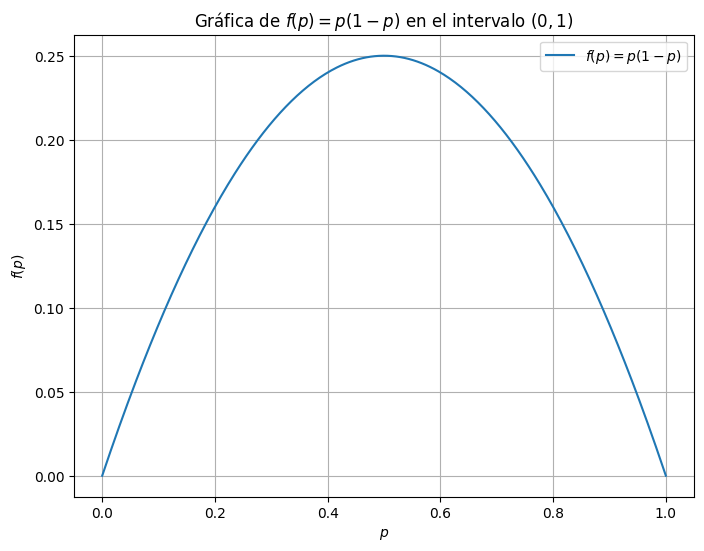

In [3]:
# Definir la función
def f(p):
    return p * (1 - p)

# Crear un rango de valores para p en el intervalo (0, 1)
p_values = np.linspace(0, 1, 400)
f_values = f(p_values)

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.plot(p_values, f_values, label='$f(p) = p(1 - p)$')
plt.xlabel('$p$')
plt.ylabel('$f(p)$')
plt.title('Gráfica de $f(p) = p(1 - p)$ en el intervalo $(0, 1)$')
plt.legend()
plt.grid(True)
plt.show()

Observamos que el punto mas alto se da en $f(p)=\frac{1}{4}$, por lo tanto,

$$p(1-p)\leq\frac{1}{4}$$

Entonces,

$$N\leq\frac{\frac{16}{4}}{0.01(0.1)^2}=40000$$

Finalmente, simulamos este proceso.

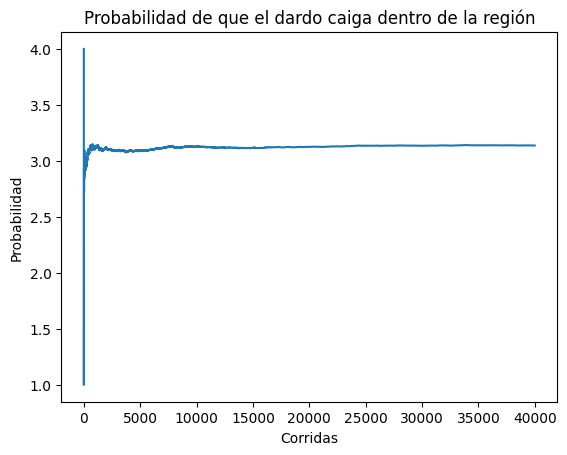

In [22]:
# Definimos la función para la probabilidad
def estimacion(N):
  l = []
  exitos = 0
  for i in range(N):
    U1 = rnd.random()
    U2 = rnd.random()
    if U2 <= np.sqrt(1 - U1**2):
      exitos += 1
    prob = exitos / (i+1)
    l.append(4*prob)
  return l

# Graficamos
G = estimacion(40000)
plt.plot(G)
plt.title('Probabilidad de que el dardo caiga dentro de la región')
plt.xlabel('Corridas')
plt.ylabel('Probabilidad')
plt.show()

De acuerdo a la grafica, el valor de $N=40000$ corridas es muy grande ya que con una muestra de 5000 o menos se observa que se llega al estado estable, entonces tomaremos un valor de $N=5000$.

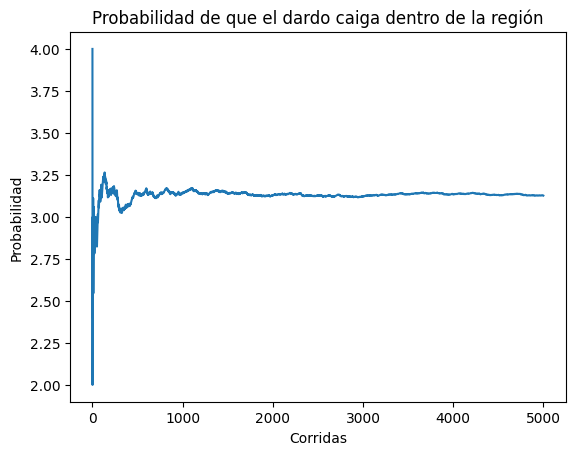

In [23]:
# Graficamos
G = estimacion(5000)
plt.plot(G)
plt.title('Probabilidad de que el dardo caiga dentro de la región')
plt.xlabel('Corridas')
plt.ylabel('Probabilidad')
plt.show()

In [24]:
# Obtenemos la media, varianza y desviación estandar para generar intervalos de confianza
media = np.mean(G)
varianza = np.var(G)
desviacion = np.std(G)
print("La media es:", media)
print("La varianza es:", varianza)
print("La desviación estandar es:", desviacion)

La media es: 3.1307134769038445
La varianza es: 0.001694266500327196
La desviación estandar es: 0.04116146863666548


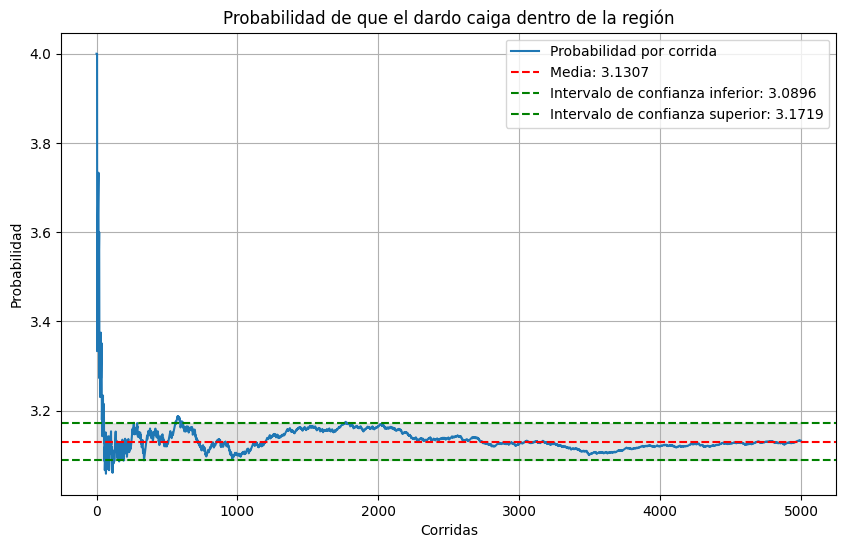

In [26]:
# Generar datos
G = estimacion(5000)

# Calcular los intervalos de confianza
confianza_inf = media - desviacion
confianza_sup = media + desviacion

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(G, label='Probabilidad por corrida')
plt.axhline(media, color='r', linestyle='--', label=f'Media: {media:.4f}')
plt.axhline(confianza_inf, color='g', linestyle='--', label=f'Intervalo de confianza inferior: {confianza_inf:.4f}')
plt.axhline(confianza_sup, color='g', linestyle='--', label=f'Intervalo de confianza superior: {confianza_sup:.4f}')
plt.fill_between(range(len(G)), confianza_inf, confianza_sup, color='gray', alpha=0.2)

# Añadir títulos y etiquetas
plt.title('Probabilidad de que el dardo caiga dentro de la región')
plt.xlabel('Corridas')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

Todo este proceso es una corrida de la simulación, por lo tanto, generamos el codigo para la simulación como sigue:

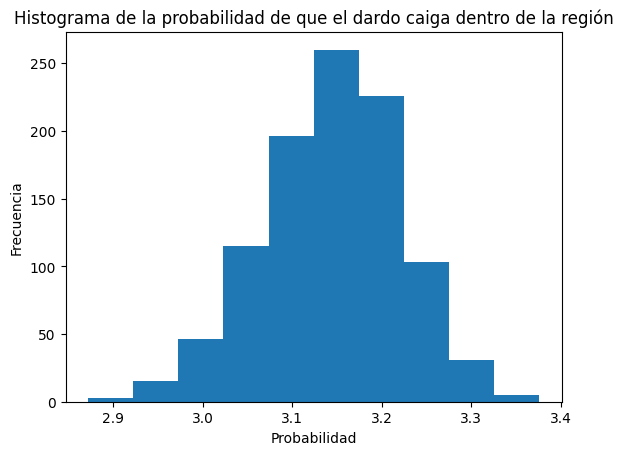

In [30]:
def corridas(N):
  l = []
  exitos = 0
  for i in range(N):
    U1 = rnd.random()
    U2 = rnd.random()
    if U2 <= np.sqrt(1 - U1**2):
      exitos += 1
    prob = exitos / (i+1)
    l.append(4*prob)
  return l[-1]

# Fijamos ahora N=500, esta función nos va agenerar la simulación
def simulacion(M):
  r = []
  for i in range(M):
    R = corridas(500)
    r.append(R)
  return r

# Graficamos
S = simulacion(1000)
plt.hist(S)
plt.title('Histograma de la probabilidad de que el dardo caiga dentro de la región')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.show()

En Python, no existe una función específica que automáticamente determine el tipo exacto de distribución que sigue un conjunto de datos. Sin embargo, hay herramientas y métodos en bibliotecas como *scipy.stats* y *statsmodels* que pueden ayudar a comparar los datos con varias distribuciones y determinar cuál es la mejor.

In [32]:
import scipy.stats as stats

# Ajustar a varias distribuciones y comparar
distribuciones = [stats.norm, stats.expon, stats.beta, stats.gamma]
mejor_distribucion = None
mejor_pvalor = 0

for distribucion in distribuciones:
    params = distribucion.fit(S)
    ks_stat, p_value = stats.kstest(S, distribucion.cdf, args=params)
    print(f'Distribución: {distribucion.name}, KS Statistic: {ks_stat:.4f}, p-value: {p_value:.4f}')

    if p_value > mejor_pvalor:
        mejor_pvalor = p_value
        mejor_distribucion = distribucion

Distribución: norm, KS Statistic: 0.0438, p-value: 0.0418
Distribución: expon, KS Statistic: 0.3711, p-value: 0.0000
Distribución: beta, KS Statistic: 0.0403, p-value: 0.0754
Distribución: gamma, KS Statistic: 0.0529, p-value: 0.0071


El programa usa una prueba de Kolmogorov-Smirnov para comparar cuál se ajusta mejor.

El valor p nos ayuda a decidir si rechazamos la hipótesis nula. Un valor p alto sugiere que no hay suficiente evidencia para rechazar la hipótesis nula, es decir, los datos podrían seguir la distribución propuesta. Un valor p bajo indica que es poco probable que los datos sigan la distribución propuesta y, por lo tanto, rechazamos la hipótesis nula.

En nuestro caso:

La distribución beta tiene el p-value más alto (0.0754), lo que sugiere que hay una mayor probabilidad de que los datos sigan una distribución beta comparada con las otras distribuciones probadas.

La distribución exponencial tiene un p-value de 0.0000, lo que indica que es extremadamente improbable que los datos sigan una distribución exponencial.

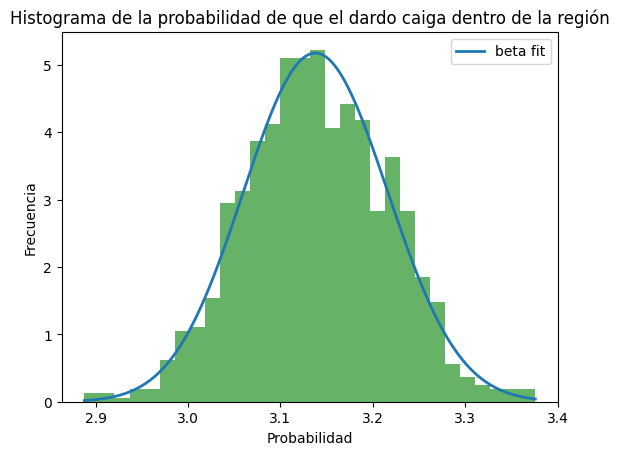

In [34]:
# Graficar la mejor distribución ajustada
S = simulacion(1000)
plt.hist(S, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histograma de la probabilidad de que el dardo caiga dentro de la región')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')

params = mejor_distribucion.fit(S)
x = np.linspace(min(S), max(S), 1000)
pdf_fitted = mejor_distribucion.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
plt.plot(x, pdf_fitted, label=f'{mejor_distribucion.name} fit', lw=2)

plt.legend()
plt.show()